<a href="https://colab.research.google.com/github/dantebarross/scientific-projects-with-python/blob/main/The_colorful_rainbow_of_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Noise can be differentiate by its color. 

# White and brown noise

Formula to creating white noise:

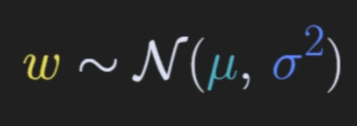

White noise is generated by randomly sampling from a Gaussian normal distribution, with some mean value and some variance or standard deviation. 

Formula to generate brown noise:

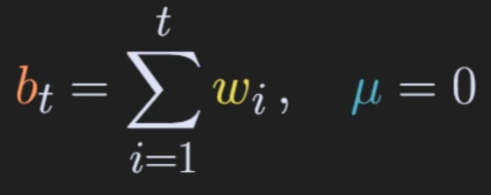

After white noise is created, brownian noise can be created through what's called cumulative sum of the white noise (e.g., the tenth point of brownian noise is the sum of the white noise over the first 10 data points)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

npnts = int(1e5) # 1 . 10^5
npnts

100000

In [8]:
white_noise = np.random.randn(npnts)
brown_noise = np.cumsum(white_noise)
white_noise

array([ 0.64333286, -0.54057057, -0.96534734, ...,  1.32599416,
       -0.31538859, -0.46818059])

In [9]:
brown_noise

array([ 6.43332865e-01,  1.02762294e-01, -8.62585045e-01, ...,
        2.32052774e+02,  2.31737386e+02,  2.31269205e+02])

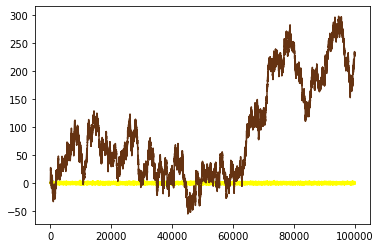

In [12]:
plt.plot(white_noise, color=[1, 1, 0]) # color = 100% RED, 100% GREEN, 0% BLUE
plt.plot(brown_noise, color=[.4, .2, .07]) # brown
plt.show()

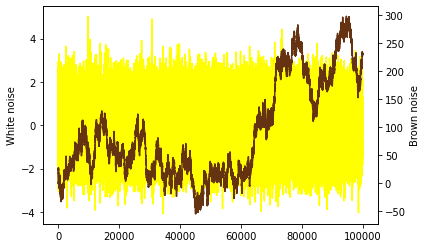

In [16]:
fig, ax = plt.subplots(1)
ax.plot(white_noise, color=[1, 1, 0])
ax.set_ylabel('White noise')
ax2 = ax.twinx() # they are going to share the X-axis (and going to have their own unique Y-axis)
ax2.plot(brown_noise, color=[.4, .2, .07])
ax2.set_ylabel('Brown noise')
plt.show()

In [18]:
# Let's generate the power spectrum

# Taking Fourier transform of these signals
white_noise_X = np.abs(fftpack.fft(white_noise)) # "X" means "spectral"
white_noise_X = white_noise_X / npnts # normalizing, dividing by the number of points
white_noise_X

array([0.00231269, 0.00214163, 0.0019709 , ..., 0.00181167, 0.0019709 ,
       0.00214163])

In [20]:
brown_noise_X = np.abs(fftpack.fft(brown_noise))
brown_noise_X = brown_noise_X / npnts
brown_noise_X

array([90.40721838, 48.30045902, 22.90836116, ...,  2.7152959 ,
       22.90836116, 48.30045902])

In [23]:
# Vector of frequencies
frex = np.linspace(0, 1, int(npnts / 2 + 1))
frex

array([0.0000e+00, 2.0000e-05, 4.0000e-05, ..., 9.9996e-01, 9.9998e-01,
       1.0000e+00])

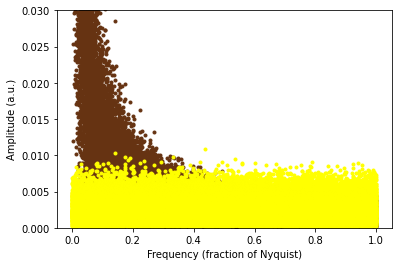

In [28]:
plt.plot(frex, brown_noise_X[:len(frex)], '.', color=[.4, .2, .07])
plt.plot(frex, white_noise_X[:len(frex)], '.', color=[1, 1, 0])
plt.ylim([0, .03])
plt.xlabel('Frequency (fraction of Nyquist)')
plt.ylabel('Amplitude (a.u.)')
plt.show()

# Pink and blue noise

Pink noise looks a lot like white noise. It's just randomic data points in Time domain. But in frequency, looks like something between white and brownian noise.

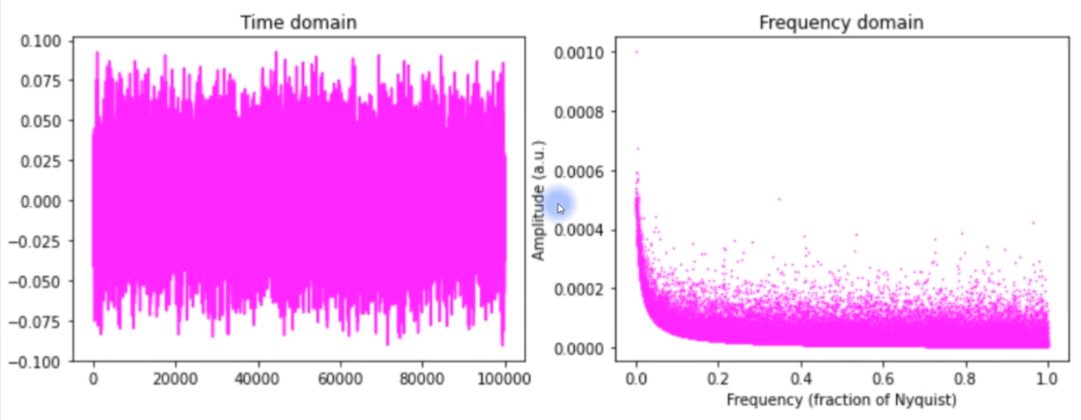